## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
df.shape

(13393, 12)

In [8]:
df['class'].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [10]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [12]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [14]:
df.head(2)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A


In [26]:
df['gender']=pd.get_dummies(df.gender,drop_first=True)

In [27]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [28]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [29]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler

In [40]:
X=df.drop('class',axis=1)
y=df['class']

In [34]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [51]:
len(X.columns)

11

In [55]:
sum(model.feature_importances_)

0.9999999999999998

In [48]:
print(model.feature_importances_)

[0.09153453 0.01483871 0.06526707 0.08554577 0.098768   0.05962305
 0.06115808 0.08187018 0.19995046 0.15820594 0.08323821]


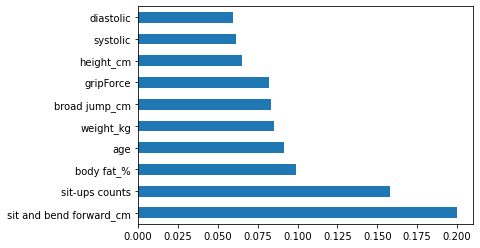

In [49]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [53]:
X.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

In [56]:
X.drop('gender',axis=1,inplace=True)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
sc=StandardScaler()
Xs=sc.fit_transform(X)

In [70]:
X_train,X_test,y_train,y_test=train_test_split(Xs,y,test_size=0.3,random_state=0)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
model1=RandomForestClassifier()
model1.fit(X_train,y_train)
ytrain_pred=model1.predict(X_train)

In [73]:
ytest_pred=model1.predict(X_test)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_train,ytrain_pred))
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2337
           1       1.00      1.00      1.00      2353
           2       1.00      1.00      1.00      2362
           3       1.00      1.00      1.00      2323

    accuracy                           1.00      9375
   macro avg       1.00      1.00      1.00      9375
weighted avg       1.00      1.00      1.00      9375

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1011
           1       0.63      0.61      0.62       994
           2       0.70      0.66      0.68       987
           3       0.90      0.81      0.85      1026

    accuracy                           0.74      4018
   macro avg       0.74      0.74      0.74      4018
weighted avg       0.74      0.74      0.74      4018



In [76]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [83]:
CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [84]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [85]:
rfc1=RandomForestClassifier(random_state=0, max_features='log2', n_estimators= 500, max_depth=8, criterion='entropy')

In [86]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=500, random_state=0)

In [87]:
y_train_pred=rfc1.predict(X_train)
y_test_pred=rfc1.predict(X_test)

In [88]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.75      1011
           1       0.58      0.53      0.55       994
           2       0.69      0.62      0.66       987
           3       0.89      0.78      0.83      1026

    accuracy                           0.70      4018
   macro avg       0.71      0.70      0.70      4018
weighted avg       0.71      0.70      0.70      4018



In [89]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79      2337
           1       0.72      0.65      0.68      2353
           2       0.82      0.72      0.77      2362
           3       0.95      0.83      0.89      2323

    accuracy                           0.78      9375
   macro avg       0.79      0.78      0.78      9375
weighted avg       0.79      0.78      0.78      9375

